In [4]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from scipy.stats import norm
plt.style.use('tableau-colorblind10')

# awake recording data for mouse28-140313
mat_name = 'Mouse28-140313_simple_awakedata.mat'
# path to data directory
data_dir = os.getcwd()
file_name = os.path.join(data_dir, mat_name)

mat = loadmat(file_name)
headangle = np.ravel(np.array(mat['headangle'])) 
cellspikes = np.array(mat['cellspikes']) 
cellnames = np.array(mat['cellnames']) 
trackingtimes = np.ravel(np.array(mat['trackingtimes']))

z = headangle
t_max = len(z)
whiches = np.isnan(z)
z = z[~whiches]
z = z % (2 * np.pi)

starttime = min(trackingtimes)
tracking_interval = np.mean(trackingtimes[1:] - trackingtimes[:(-1)])
binsize = tracking_interval
nbins = len(trackingtimes)
binnedspikes = np.zeros((len(cellnames), nbins))
for i in range(len(cellnames)):
    spikes = np.ravel((cellspikes[0])[i])
    for j in range(len(spikes)):
        timebin = int(np.floor((spikes[j] - starttime)/float(binsize)))
        if(timebin > nbins - 1 or timebin < 0): 
            continue
        binnedspikes[i,timebin] += 1
binnedspikes = binnedspikes[:, ~whiches]


sgood = [7,15,16,17,19,21,22,23,25,26,38,46,47,48,49,51,54,55,
         57,58,60,61,62,65,66,67]
binnedspikes = binnedspikes[sgood,:]
cellnames = cellnames[sgood]

bins = np.linspace(-0.000001, 2. * np.pi + 0.0000001, num=30 + 1)
x_grid = 0.5 * (bins[:(-1)] + bins[1:])
observed_mean_spikes_in_bins = np.zeros((len(cellnames), 30))

for i in range(len(cellnames)):
    for x in range(30):
        timesinbin = (z > bins[x]) * (z < bins[x + 1])
        if(np.sum(timesinbin) > 0):
            observed_mean_spikes_in_bins[i, x] = np.mean(binnedspikes[i, timesinbin])
            
        elif i==0:
            print("No observations of X between", bins[x], "and", bins[x + 1], ".")
            
    timesinbin = (z > bins[x]) * (z < bins[x + 1])

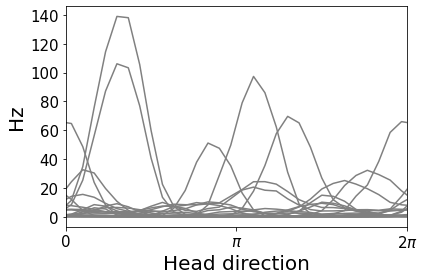

In [32]:
plt_grid = np.insert(x_grid, len(x_grid), x_grid[-1] + (x_grid[0] + x_grid[1])/2)
plt_grid = np.insert(plt_grid, 0, x_grid[0] - (x_grid[0] + x_grid[1])/2)

fig, ax = plt.subplots()

for i in range(len(cellnames)):
    plt_spikes = np.insert(observed_mean_spikes_in_bins[i, :],
                           len(observed_mean_spikes_in_bins[i, :]),
                           observed_mean_spikes_in_bins[i, :][0])
    plt_spikes = np.insert(plt_spikes, 0, observed_mean_spikes_in_bins[i, :][-1])
    ax.plot(plt_grid, plt_spikes /(0.025), color='grey')  
plt.xlabel("Head direction", fontsize=20)
plt.ylabel("Hz", fontsize=20)
    
plt.xticks([0,np.pi,2*np.pi], [0, r'$\pi$', r'$2\pi$'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0,2*np.pi)

plt.tight_layout()
#plt.savefig(time.strftime("./plots/%Y-%m-%d-") + "Mouse28_neurons_showcase1" + ".pdf")
plt.show()

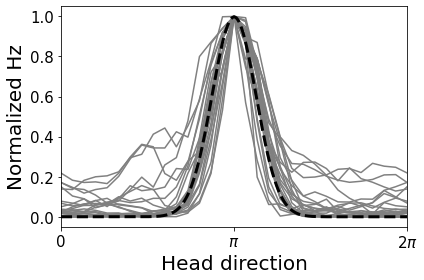

In [46]:
plt_grid = np.insert(x_grid, len(x_grid), x_grid[-1] + (x_grid[0] + x_grid[1])/2)
plt_grid = np.insert(plt_grid, 0, x_grid[0] - (x_grid[0] + x_grid[1])/2)
plt_grid -= plt_grid[1]

fig, ax = plt.subplots()

for i in range(len(cellnames)):
    shift_spikes = np.roll(observed_mean_spikes_in_bins[i,:],
                           15 - np.argmax(observed_mean_spikes_in_bins[i,:]))
    plt_spikes = np.insert(shift_spikes, len(observed_mean_spikes_in_bins[i, :]),
          shift_spikes[0])
    plt_spikes = np.insert(plt_spikes, 0, shift_spikes[-1])
    ax.plot(plt_grid, plt_spikes /(np.max(plt_spikes)), color='grey')
ax.plot(np.linspace(0,2*np.pi,1000), norm.pdf(np.linspace(0,2*np.pi,1000),
                                              loc=np.pi, scale=0.40),
        color='black', linestyle='--', linewidth=3)
plt.xlabel("Head direction", fontsize=20)
plt.ylabel("Normalized Hz", fontsize=20)
    
plt.xticks([0, np.pi, 2*np.pi], [0, r'$\pi$', r'$2\pi$'], fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 2*np.pi)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)

plt.tight_layout()
#plt.savefig(time.strftime("./plots/%Y-%m-%d-") + "Mouse28_neurons_showcase2" + ".pdf")
plt.show()